# Lending Case Study Notebook

## Introduction

### Goal

How data can be used to find out the driving factors to minimize the risk of losing money while lending to customers.

### Problem Statement

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Objective

Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loan.


### Steps of analysis:
1. Data Understanding
2. Data Wrangling
3. Data Visualization and Analysis
4. Conclusion

In [335]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings library will be used to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#importing Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 

In [337]:
#Loading Dataset into a dataframe
# setting the low_memory flag as false as there are 47 columns having mixed types
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [338]:
# Loading the Data Dictionary

dd = pd.read_excel('Data_Dictionary.xlsx')

dd.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [339]:
#Shape of our dataset
df.shape

(39717, 111)

In [340]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Knowing our Dataset

In [341]:
## Number of rows and columns
print('Number of Columns:',df.shape[1])
print('Number of Rows:',df.shape[0])

## Number of missing values
print('Number of missing values:',df.isnull().sum().sum())

## Number of unique values
print('Number of unique values:',df.nunique().sum())

## Number of duplicates
print('Number of duplicates:',df.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [343]:
# Knowing Datatypes of each column

df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [344]:
# Bird's Eye view on our data set
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

## Data Understanding

As we know our goal is to analyse the loan applicants which are likely to default and would be financial loss to the lending club.
Hence the columns having data, after the loan was approved does not have any relevance to our analysis

Following are the columns which have no relevance to our analysis as they have data, after the loan was approved

- delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- earliest_cr_line - The month the borrower's earliest reported credit line was opened
- inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- open_acc - The number of open credit lines in the borrower's credit file.
- pub_rec - Number of derogatory public records
- revol_bal - Total credit revolving balance
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc - The total number of credit lines currently in the borrower's credit file
- out_prncp - Remaining outstanding principal for total amount funded
- out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
- total_pymnt - Payments received to date for total amount funded
- total_pymnt_inv - Payments received to date for portion of total amount funded by investors
- total_rec_prncp - Principal received to date
- total_rec_int - Interest received to date
- total_rec_late_fee - Late fees received to date
- recoveries - post charge off gross recovery
- collection_recovery_fee - post charge off collection fee
- last_pymnt_d - Last month payment was received
- last_pymnt_amnt - Last total payment amount received
- last_credit_pull_d - The most recent month LC pulled credit for this loan
- application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [345]:
df=df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)


In [346]:
df.shape

(39717, 90)

In [347]:
df.zip_code

0        860xx
1        309xx
2        606xx
3        917xx
4        972xx
         ...  
39712    802xx
39713    274xx
39714    017xx
39715    208xx
39716    027xx
Name: zip_code, Length: 39717, dtype: object

Zip code is having masked data hence it is of no use to us and should be removed

In [348]:
df=df.drop(['zip_code'],axis=1)

In [349]:
df.shape

(39717, 89)

In [350]:
df[['title','emp_title','desc','url']]

title                   emp_title  \
0                       Computer                         NaN   
1                           bike                       Ryder   
2           real estate business                         NaN   
3                       personel         AIR RESOURCES BOARD   
4                       Personal    University Medical Group   
...                          ...                         ...   
39712           Home Improvement             FiSite Research   
39713  Retiring credit card debt  Squarewave Solutions, Ltd.   
39714     MBA Loan Consolidation                         NaN   
39715                   JAL Loan                         NaN   
39716         Consolidation Loan            Evergreen Center   

                                                    desc  \
0        Borrower added on 12/22/11 > I need to upgra...   
1        Borrower added on 12/22/11 > I plan to use t...   
2                                                    NaN   
3        Borrower added on 12/21/11 > to pay for prop...   
4        Borrower added on 12/21/11 > I plan on combi...   
...                                                  ...   
39712  Our current gutter system on our home is old a...   
39713  The rate of interest and fees incurred by carr...   
39714                                                NaN   
39715                                                NaN   
39716  I plan to consolidate over $7,000 of debt: a c...   

                                                     url  
0      https://lendingclub.com/browse/loanDetail.acti...  
1      https://lendingclub.com/browse/loanDetail.acti...  
2      https://lendingclub.com/browse/loanDetail.acti...  
3      https://lendingclub.com/browse/loanDetail.acti...  
4      https://lendingclub.com/browse/loanDetail.acti...  
...                                                  ...  
39712  https://lendingclub.com/browse/loanDetail.acti...  
39713  https://lendingclub.com/browse/loanDetail.acti...  
39714  https://lendingclub.com/browse/loanDetail.acti...  
39715  https://lendingclub.com/browse/loanDetail.acti...  
39716  https://lendingclub.com/browse/loanDetail.acti...  

[39717 rows x 4 columns]

As we can see above, these columns are having random values and we wont be able to draw any analysis on it, hence should be removed

In [351]:
df=df.drop(['title','emp_title','desc','url'],axis=1)

In [352]:
df.shape

(39717, 85)

In [353]:
# Since member id is a duplicate index column and should be removed
df=df.drop(['member_id'], axis=1)

In [354]:
df.shape

(39717, 84)

Removing Funded Amount column i.e funded_amnt_inv as its for internal purposes only, hence insignificant to our analysis

In [355]:
df=df.drop(['funded_amnt_inv'], axis=1)

In [356]:
df.shape

(39717, 83)

## Data Cleaning and Manipulation

#### Cleaning the Rows and columns having large number of null values

In [357]:
#counting the percentage of null values in each column
null_count=df.isnull().sum()
length=len(df.index)

total_null_percent=round((null_count/length)*100,2)


In [358]:
total_null_percent[total_null_percent>0]

emp_length                      2.71
mths_since_last_delinq         64.66
mths_since_last_record         92.99
next_pymnt_d                   97.13
collections_12_mths_ex_med      0.14
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 62, dtype: float64

In [359]:
#We can see there are 68 columns which are having some missing values
# Now we do not intend to drop all of them, instead we will only drop the columns which are having more than 50% of missing values
len(total_null_percent[total_null_percent>50])

57

In [360]:
# Dropping the 58 columns in our dataset which have more than 50% of missing values
df.drop(total_null_percent[ total_null_percent > 50 ].index, axis=1, inplace=True)

In [361]:
df.shape

(39717, 26)

In [362]:
#Verifying the columns cleaned of null values

(df.isnull().sum()/len(df.index)*100).round(2).sort_values(ascending=False)

emp_length                    2.71
pub_rec_bankruptcies          1.75
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
tax_liens                     0.10
pymnt_plan                    0.00
delinq_amnt                   0.00
acc_now_delinq                0.00
policy_code                   0.00
initial_list_status           0.00
dti                           0.00
addr_state                    0.00
purpose                       0.00
id                            0.00
loan_amnt                     0.00
issue_d                       0.00
verification_status           0.00
annual_inc                    0.00
home_ownership                0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt                   0.00
loan_status                   0.00
dtype: float64

Now we have removed the columns which contained more than 50% missing values as they would've reduce impacted the accuracy of the analysis.

In [363]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [364]:
# Finding the number of missing values in rows
df.isnull().sum(axis=1).sort_values(ascending=False)

39716    4
39687    4
39694    4
39693    4
39692    4
        ..
13477    0
13478    0
13479    0
13480    0
19858    0
Length: 39717, dtype: int64

Maximum number of missing values in a row is 6 which is very low, hence removing them would be insignificant for our analysis. Lets move ahead

Now columns which are having only one unique value are also insignificant to our analysis as neither univariate nor bivariate analysis can be performed on them, hence should be removed

In [365]:
df.nunique().sort_values()

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64

These are the columns which should be removed as they are having only one unique value

tax_liens                         
pymnt_plan                        
collections_12_mths_ex_med        
policy_code                       
initial_list_status               
chargeoff_within_12_mths          
delinq_amnt                       
acc_now_delinq                    

In [366]:
df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'],
         axis=1, inplace=True)

In [367]:
df.shape

(39717, 18)

In [368]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

Now that we have the relevant columns for our analysis, we should move further to clean our data of null or missing values


#### Handling Null Values

In [369]:
# Counting the missing or null values in each column
df.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64

Following are the two columns with null values, which needs to be handled as per our analysis objective

- emp_length              
- pub_rec_bankruptcies     

In [370]:
#Analysing the emp_length column
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [371]:
#Analysing the pub_rec_bankruptcies column
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

We can come to this conclusion that for 'emp_lenngth', no other value can be substituted as the distribution is fair, hence removing the null values would be the best approach

For 'pub_rec_bankruptcies' as mostly all the values are 0.0, hence subtituting 0.0 in place of missing values would be the best approach and it would not impact our analysis

In [372]:
df.dropna(subset=['emp_length'],inplace=True)

In [373]:
df.shape

(38642, 18)

In [374]:
# Inserting 0 for null values in pub_rec_bankruptcies column
df.pub_rec_bankruptcies.fillna(0,inplace=True)

In [375]:
df.shape

(38642, 18)

#### Handling Duplicate Rows

In [376]:
df.duplicated().sum()

0

Observation - There were no duplicate rows in our dataset

#### Handling Data Types of Columns

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

Info - Analysing columns, one by one and fixing them if needed, id, loan_amount and funded_amnt are in int64 datatype hence need not to be checked, we will start from term

In [378]:
df.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38642, dtype: object

Observation - term column consists of ' months' as an extra value 

Action Needed - ' months' needs to be removed and then the column datatype should be converted to int

In [379]:
df.term=df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  int64  
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [381]:
# Now lets check int_rate
df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38642, dtype: object

Observation - int_rate values consists of an extra "%" character

Action Needed - "%" needs to be removed from values of int_rate column and conversion of datatype of column to float, rounded off to 2 decimal places

In [382]:
df.int_rate=df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  int64  
 4   int_rate              38642 non-null  float64
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [384]:
df.grade=df.grade.astype('category')

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    38642 non-null  int64   
 1   loan_amnt             38642 non-null  int64   
 2   funded_amnt           38642 non-null  int64   
 3   term                  38642 non-null  int64   
 4   int_rate              38642 non-null  float64 
 5   installment           38642 non-null  float64 
 6   grade                 38642 non-null  category
 7   sub_grade             38642 non-null  object  
 8   emp_length            38642 non-null  object  
 9   home_ownership        38642 non-null  object  
 10  annual_inc            38642 non-null  float64 
 11  verification_status   38642 non-null  object  
 12  issue_d               38642 non-null  object  
 13  loan_status           38642 non-null  object  
 14  purpose               38642 non-null  object  
 15  addr_st

In [386]:
df.sub_grade

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
39712    A4
39713    C1
39714    A4
39715    A2
39716    E2
Name: sub_grade, Length: 38642, dtype: object

In [387]:
df.sub_grade=df.sub_grade.astype('category')

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    38642 non-null  int64   
 1   loan_amnt             38642 non-null  int64   
 2   funded_amnt           38642 non-null  int64   
 3   term                  38642 non-null  int64   
 4   int_rate              38642 non-null  float64 
 5   installment           38642 non-null  float64 
 6   grade                 38642 non-null  category
 7   sub_grade             38642 non-null  category
 8   emp_length            38642 non-null  object  
 9   home_ownership        38642 non-null  object  
 10  annual_inc            38642 non-null  float64 
 11  verification_status   38642 non-null  object  
 12  issue_d               38642 non-null  object  
 13  loan_status           38642 non-null  object  
 14  purpose               38642 non-null  object  
 15  addr_st

In [389]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

Observation - Most of the values are having 'year' or 'years' as extra column while others are having special characters like '+' and '<' as well

Action needed - 'year' and 'years' needs to be removed, '<' and '+' special characters be removed

In [390]:
df.emp_length=df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)


In [391]:
df.emp_length.value_counts()

emp_length
10.0    8879
0.5     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [392]:
df.home_ownership.value_counts()

home_ownership
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: count, dtype: int64

In [393]:
df.home_ownership=df.home_ownership.astype('category')

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    38642 non-null  int64   
 1   loan_amnt             38642 non-null  int64   
 2   funded_amnt           38642 non-null  int64   
 3   term                  38642 non-null  int64   
 4   int_rate              38642 non-null  float64 
 5   installment           38642 non-null  float64 
 6   grade                 38642 non-null  category
 7   sub_grade             38642 non-null  category
 8   emp_length            38642 non-null  float64 
 9   home_ownership        38642 non-null  category
 10  annual_inc            38642 non-null  float64 
 11  verification_status   38642 non-null  object  
 12  issue_d               38642 non-null  object  
 13  loan_status           38642 non-null  object  
 14  purpose               38642 non-null  object  
 15  addr_st

In [395]:
df.annual_inc

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38642, dtype: float64

In [396]:
df.verification_status.value_counts()

verification_status
Not Verified       16498
Verified           12353
Source Verified     9791
Name: count, dtype: int64

In [397]:
df.verification_status=df.verification_status.astype('category')

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    38642 non-null  int64   
 1   loan_amnt             38642 non-null  int64   
 2   funded_amnt           38642 non-null  int64   
 3   term                  38642 non-null  int64   
 4   int_rate              38642 non-null  float64 
 5   installment           38642 non-null  float64 
 6   grade                 38642 non-null  category
 7   sub_grade             38642 non-null  category
 8   emp_length            38642 non-null  float64 
 9   home_ownership        38642 non-null  category
 10  annual_inc            38642 non-null  float64 
 11  verification_status   38642 non-null  category
 12  issue_d               38642 non-null  object  
 13  loan_status           38642 non-null  object  
 14  purpose               38642 non-null  object  
 15  addr_st

In [399]:
df.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38642, dtype: object

In [400]:
#Converting issue_d column to date time
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')

In [401]:
df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38642, dtype: datetime64[ns]

Extracting 2 more columns from issue_d column, namely issue_year, issue_month

In [402]:
df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year

In [403]:
df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month

In [404]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month'],
      dtype='object')

In [405]:
df.issue_year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38642, dtype: int32

In [406]:
df.issue_month

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_month, Length: 38642, dtype: int32

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38642 non-null  int64         
 1   loan_amnt             38642 non-null  int64         
 2   funded_amnt           38642 non-null  int64         
 3   term                  38642 non-null  int64         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  category      
 7   sub_grade             38642 non-null  category      
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  category      
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  category      
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

In [408]:
df.purpose=df.purpose.astype('category')

In [409]:
df.addr_state=df.addr_state.astype('category')

In [410]:
# Setting decimal point limit for all data 
for x in df.columns:
    if(df[x].dtype=='float64'):
      df[x]=df[x].round(2)
      
df.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.5           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
4        B5         1.0           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
4 2011-12-01      Current           other         OR  17.94   

   pub_rec_bankruptcies  issue_year  issue_month  
0                   0.0        2011           12  
1                   0.0        2011           12  
2                   0.0        2011           12  
3                   0.0        2011           12  
4                   0.0        2011           12

In [411]:
df.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
issue_year              0
issue_month             0
dtype: int64

Now that we have handled the null values, lets filter the columns which are needed further for our analysis

In [412]:
df.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [413]:
#Lets remove the loans which are having status as current as its irrelevant for our analysis
df=df[df.loan_status!='Current']

In [414]:
df.shape

(37544, 20)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    37544 non-null  int64         
 1   loan_amnt             37544 non-null  int64         
 2   funded_amnt           37544 non-null  int64         
 3   term                  37544 non-null  int64         
 4   int_rate              37544 non-null  float64       
 5   installment           37544 non-null  float64       
 6   grade                 37544 non-null  category      
 7   sub_grade             37544 non-null  category      
 8   emp_length            37544 non-null  float64       
 9   home_ownership        37544 non-null  category      
 10  annual_inc            37544 non-null  float64       
 11  verification_status   37544 non-null  category      
 12  issue_d               37544 non-null  datetime64[ns]
 13  loan_status          

In [416]:
df=df.drop(['funded_amnt','installment','issue_d'],axis=1)

In [417]:
df.shape

(37544, 17)

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    37544 non-null  int64   
 1   loan_amnt             37544 non-null  int64   
 2   term                  37544 non-null  int64   
 3   int_rate              37544 non-null  float64 
 4   grade                 37544 non-null  category
 5   sub_grade             37544 non-null  category
 6   emp_length            37544 non-null  float64 
 7   home_ownership        37544 non-null  category
 8   annual_inc            37544 non-null  float64 
 9   verification_status   37544 non-null  category
 10  loan_status           37544 non-null  object  
 11  purpose               37544 non-null  category
 12  addr_state            37544 non-null  category
 13  dti                   37544 non-null  float64 
 14  pub_rec_bankruptcies  37544 non-null  float64 
 15  issue_y

In [419]:
# For our Univariate and Bivariate Analysis it is important to label columns as categorical and numerical

categorical_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
continous_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
index_cols=['id']
result_cols=['loan_status']

### Removing the Outliers

We will first start removing the outliers on the continous columns with the use of box plot 

In [420]:
#Detecting outliers on the loan_amnt column
px.box(df,
       x='loan_amnt',
       width=800,
       height=400,
       title='Loan Amount Distribution',
       labels={'loan_amnt':'Loan Amount'}).show()


Observation - We can see that the upper fence value is 29.175k which is 29175 while max value is 35k which is 35000, hence there is not much difference and it will not impact our analysis as well

No action needed

In [421]:
#Detecting outliers on int_rate column
px.box(df,
       x='int_rate',
       width=800,
       height=400,
       title='Interest Rate Distribution',
       labels={'int_rate':'Interest Rate'}).show()


Observation - We can see that the upper fence value is 22.64 while max value is 24.4, hence there is not much difference and it will not impact our analysis as well

No action needed

In [422]:
#Detecting outliers for annual income of Borrowers
px.box(df,x='annual_inc',
       width=800,
       height=400,
       title='Annual Income Distribution of the Borrowers',
       labels={'annual_inc':'Annual Income of Borrowers'}).show()


Observation - Upper Fence value is 146k whereas max value is 6M, hence our analysis will be skewed if we do not remove these outliers

Action Needed - Detect the quantile from which the outliers should be removed and then remove them

In [423]:
#Detecting the appropriate quantile to remove outliers from annual_inc column

sorted_annual_income = df['annual_inc'].sort_values().reset_index(drop=True)

fig =px.line(
    sorted_annual_income,
    width=750,
    height=350,
    title='Annual Income Trend',
    labels={'value': 'Annual Income', 'index': 'Row Count'},
    
).show()


Observation - As we can see from line chart, annual income is increasing exponentially around 99 percentile

Action Needed - Remove Outliers which are values above 99 percentile from annual_inc column

In [424]:
# Removing outliers in annual_inc greater than 99th percentile
df = df[df.annual_inc<=np.percentile(df.annual_inc,99)]

In [425]:
df.shape

(37173, 17)

In [426]:
sorted_annual_income = df['annual_inc'].sort_values().reset_index(drop=True)
px.line(sorted_annual_income,
        width=800,
        height=400,
        title='Annual Income Trend',
        labels={'value':'Annual Income','index':'Row Count'}).show()


Observation - As we can see now that the trend is more compatible with our analysis 

Action Needed - No action needed 

In [427]:
#Detecting outlier in dti column

px.box(df,
       x='dti',
       width=800,
       height=400,
       title='Distribution of Debt To Income Ratio',
       labels={'dti':'Debt to Income ratio'}).show()


Observation - There are no outliers in the Debt to Income Ratio

Action Needed - No action needed

Now all the Outliers are removed in continous columns and Data cleaning is also completed. Lets move forward with our analysis 

## Data Analysis

### Univariate Analysis

In [428]:
# Performing univariate analysis on loan_status column

df.loan_status.value_counts()*100/df.loan_status.count()

loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64

Observation - As we can see most of the loans were paid off and only a small portion of loans are charged off

Inference - Lending Club is doing better as there are higher number of loans fully paid

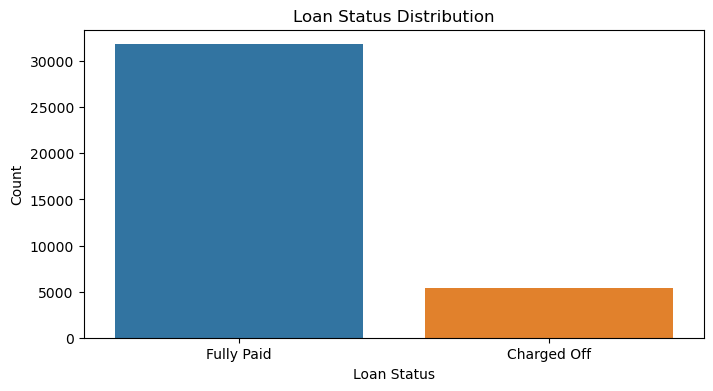

In [429]:
# Plotting the loan status for better view
plt.figure(figsize=(8,4))

ax = sns.countplot(x='loan_status', data=df, palette=['#1f77b4', '#ff7f0e'])

ax.set_title('Loan Status Distribution')

ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

In [430]:
df.loan_amnt.describe()

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Observation -  Loan Amount Varies from 500 to 35000 and the mean is 11034

In [431]:
# Performing Univariate analysis on Loan Term
df.term.value_counts()/df.term.count()*100

term
36    75.37729
60    24.62271
Name: count, dtype: float64

Observation - 75% of the loans were of 36 months tenure and only 25 % of the loans are of 60 months tenure

Inference - There is a high demand for loans having smaller tenure

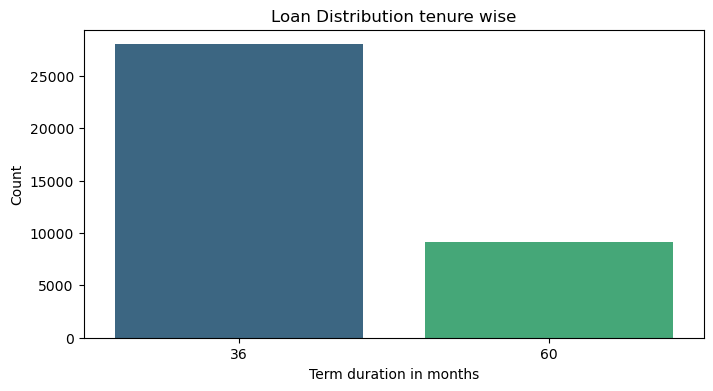

In [432]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='term', data=df, palette='viridis')
ax.set_title('Loan Distribution tenure wise')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

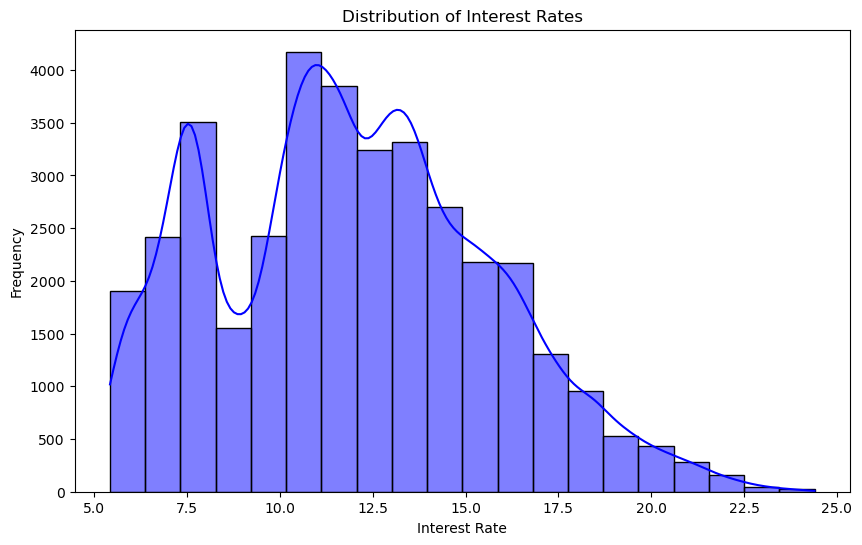

In [433]:
# Performing univariate analysis on interest rate
# Knowing how the interest rate is distributed along our dataset

plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'].sort_values(), kde=True, bins=20, color='blue')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

Observation - Most of the loans are around 5 to 8 percent and 10 to 15 percent

Inference - As there is high volume of loans around 5 to 8 percent and 10-15 percent. Lending club should push more volume of loans in that range


In [434]:
# Performing the univariate analysis of Grade
df.grade.value_counts()/df.grade.count()*100

grade
B    30.312323
A    25.806365
C    20.426116
D    13.246173
E     6.910930
F     2.523337
G     0.774756
Name: count, dtype: float64

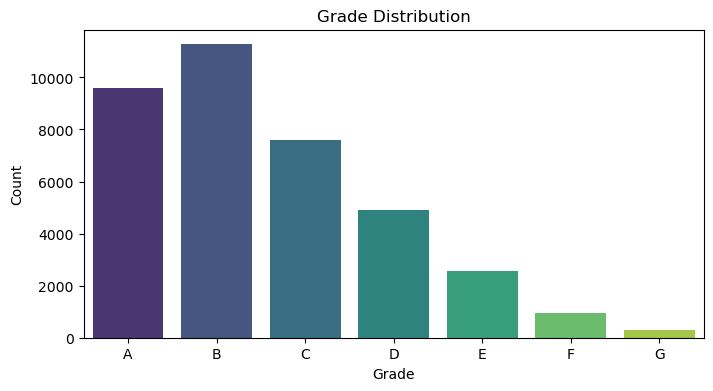

In [435]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='grade', data=df, palette='viridis')
ax.set_title('Grade Distribution')
ax.set_xlabel('Grade')
ax.set_ylabel('Count')
plt.show()

Observation - A large amount of loans are with grade 'A' and 'B' compared to rest, hence most loans are high grade loans.

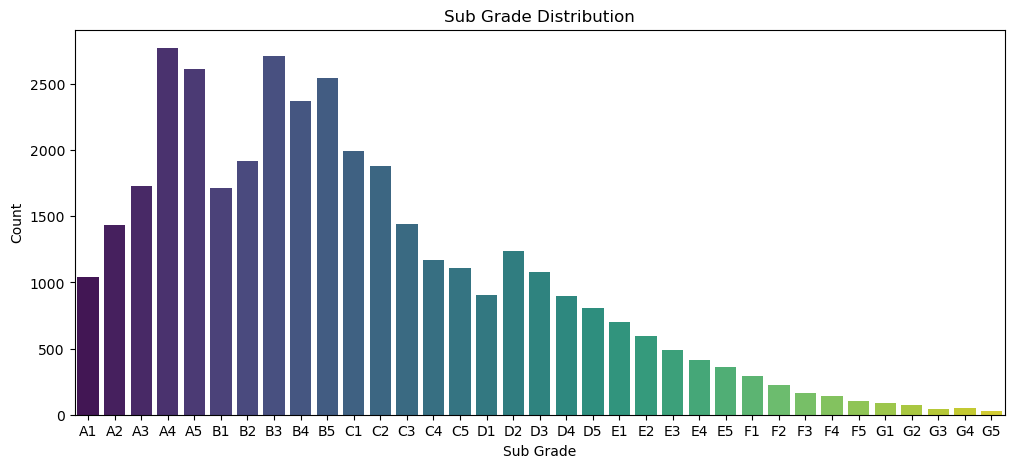

In [436]:
#Performing Univariate analysis on sub_grade

plt.figure(figsize=(12,5))
ax = sns.countplot(x='sub_grade', data=df, palette='viridis')
ax.set_title('Sub Grade Distribution')
ax.set_xlabel('Sub Grade')
ax.set_ylabel('Count')
plt.show()

Observation - Most of the loans are with subgrades of A or B as compared to rest of them, that is in match with the grade distribution. Hence we can infer that most of the loans are high grade loans

In [437]:
# Performing Univariate analysis on emp_length
df.emp_length.value_counts()/df.emp_length.count()*100

emp_length
10.0    22.473301
0.5     12.049068
2.0     11.424959
3.0     10.701315
4.0      8.925833
5.0      8.527695
1.0      8.460442
6.0      5.786458
7.0      4.565141
8.0      3.817287
9.0      3.268501
Name: count, dtype: float64

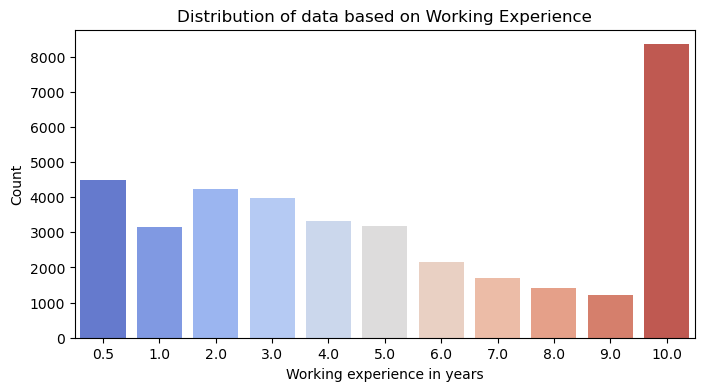

In [438]:
# Plotting the employment length to know the distribution

plt.figure(figsize=(8,4))
ax = sns.countplot(x='emp_length', data=df, palette='coolwarm')
ax.set_title('Distribution of data based on Working Experience')
ax.set_xlabel('Working experience in years')
ax.set_ylabel('Count')
plt.show()

Observation - We can see that most of the borrowers were having the working experience of more than 10 years

In [439]:
#Performing Univariate Analysis on Home Ownership

df.home_ownership.value_counts()/df.home_ownership.count()*100

home_ownership
RENT        48.419552
MORTGAGE    43.932424
OWN          7.381702
OTHER        0.258252
NONE         0.008070
Name: count, dtype: float64

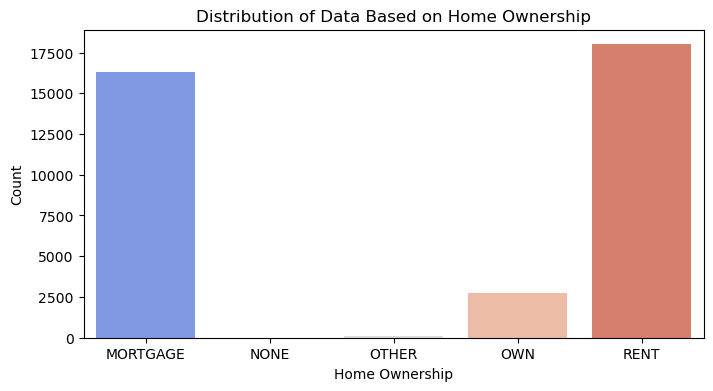

In [440]:
# Plotting the distribution of our data based on Home Ownership

plt.figure(figsize=(8,4))
ax = sns.countplot(x='home_ownership', data=df, palette='coolwarm')
ax.set_title('Distribution of Data Based on Home Ownership')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
plt.show()

Observation - Most of the borrowers do not own property, they have mortgage or they rent

In [441]:
# Performing Univariate Analysis on Verification Status

df.verification_status.value_counts()/df.verification_status.count()*100

verification_status
Not Verified       43.558497
Verified           31.210825
Source Verified    25.230678
Name: count, dtype: float64

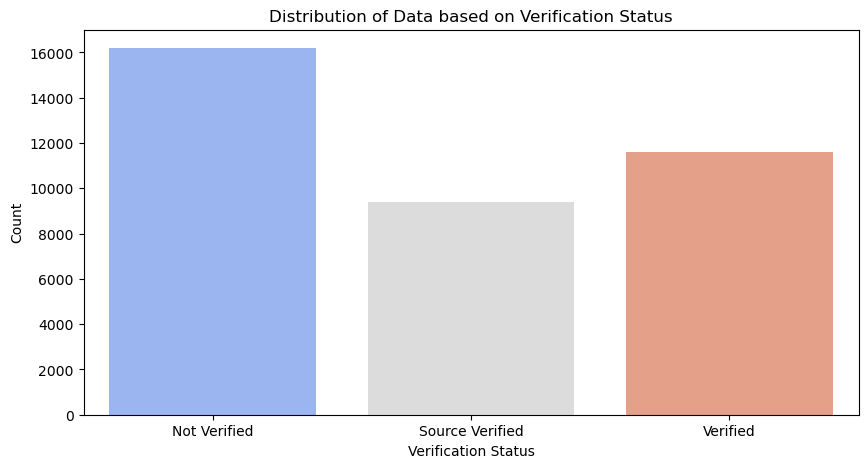

In [442]:
# Plotting the distribution of our data based on Verification status

plt.figure(figsize=(10,5))
ax = sns.countplot(x='verification_status', data=df, palette='coolwarm')
ax.set_title('Distribution of Data based on Verification Status')
ax.set_xlabel('Verification Status')
ax.set_ylabel('Count')
plt.show()

Observation - A large number of loans were not verified (Approximately 43.5 %)

Inference - Lending club should focus on verifiying the loans more as there is a huge number of loans not verified

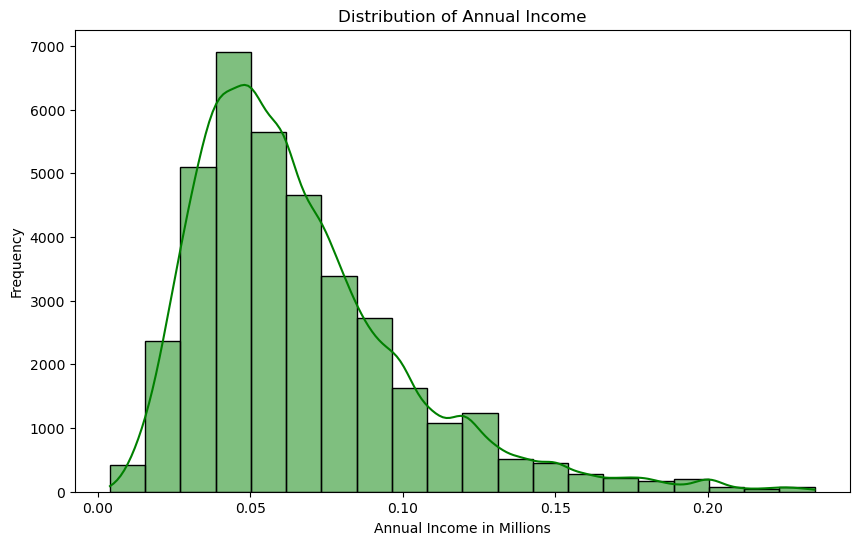

In [443]:
# Plotting the distribution of our data based on Annual Income

plt.figure(figsize=(10, 6))
sns.histplot(df['annual_inc'].sort_values()/1000000, kde=True, bins=20, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income in Millions')
plt.ylabel('Frequency')
plt.show()

Observation - Most of the borrowers who took loan had low annual income as compared to rest as it shows the left skewed normal distribution of data based on annual income

In [444]:
df.purpose.value_counts()/df.purpose.count()*100

purpose
debt_consolidation    47.184785
credit_card           13.079386
other                  9.902348
home_improvement       7.282167
major_purchase         5.541657
small_business         4.522099
car                    3.876469
wedding                2.434563
medical                1.745891
moving                 1.468808
vacation               0.936163
house                  0.928093
educational            0.850079
renewable_energy       0.247491
Name: count, dtype: float64

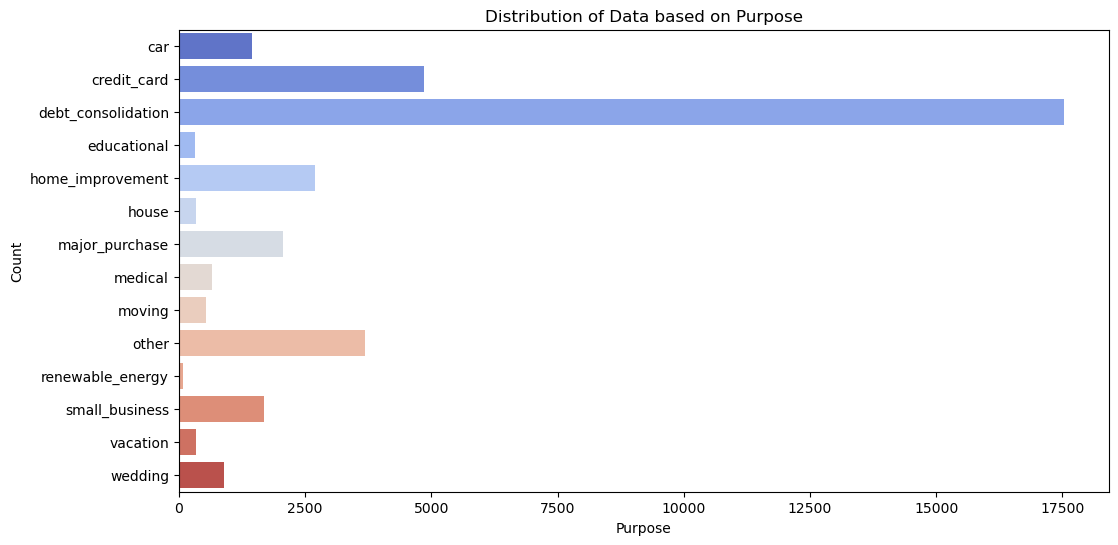

In [445]:
# Plotting the distribution of our data based on Purpose

plt.figure(figsize=(12,6))
ax = sns.countplot(y='purpose', data=df, palette='coolwarm')
ax.set_title('Distribution of Data based on Purpose')
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')
plt.show()

Observation - Most borrowers are taking loans for debt consolidation and credit card purposes

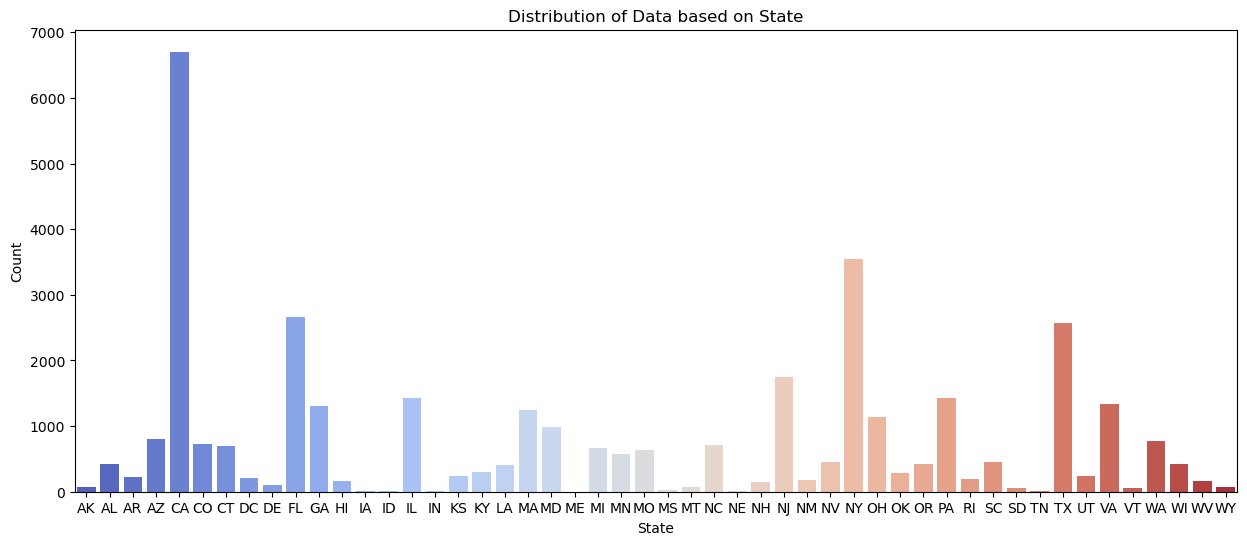

In [446]:
# Plotting the distribution of our data based on State

plt.figure(figsize=(15,6))
ax = sns.countplot(x='addr_state', data=df, palette='coolwarm')
ax.set_title('Distribution of Data based on State')
ax.set_xlabel('State')
ax.set_ylabel('Count')
plt.show()

Observation - Majority of the Borrowers were from Urban cities like California, Florida, New York and Texas

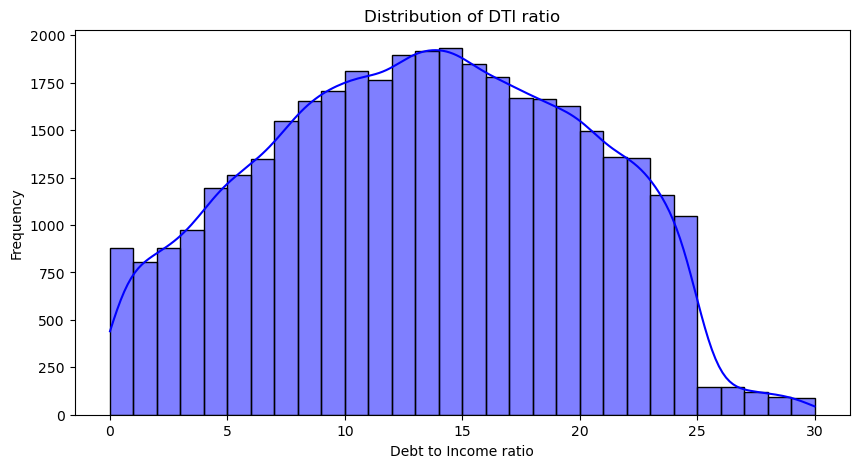

In [447]:
# Distribution of Data based on DTI (Debt to income ratio)
plt.figure(figsize=(10,5))
sns.histplot(df.dti.sort_values(),kde=True,bins=30, color='blue')
plt.xlabel('Debt to Income ratio')
plt.ylabel('Frequency')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Observation - Majority of the borrowers have more Debt to Income Ratio, mostly concentrated around 10 to 15

In [448]:
df.pub_rec_bankruptcies.value_counts()/df.pub_rec_bankruptcies.count()*100

pub_rec_bankruptcies
0.0    95.881419
1.0     4.105130
2.0     0.013451
Name: count, dtype: float64

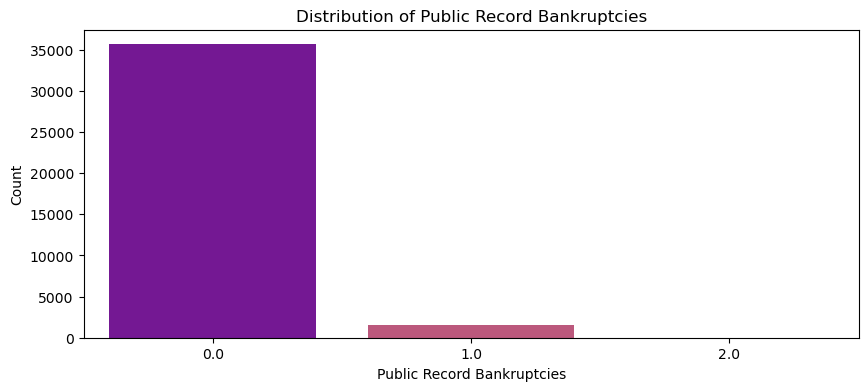

In [449]:
#Distribution of Public Record Bankruptcies

plt.figure(figsize=(10,4))
ax = sns.countplot(x='pub_rec_bankruptcies', data=df, palette='plasma')
ax.set_title('Distribution of Public Record Bankruptcies')
ax.set_xlabel('Public Record Bankruptcies')
ax.set_ylabel('Count')

plt.show()

Observation - 95% of the borrowers have no public record of bankruptcies while only 5% reported public record bankruptcies

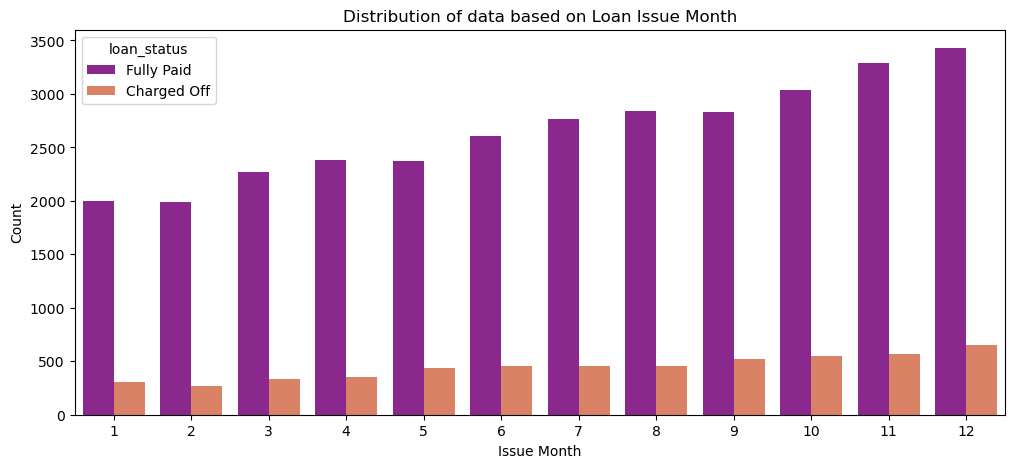

In [450]:
#Distribution of Loan Issue Month

plt.figure(figsize=(12,5))
ax = sns.countplot(x='issue_month', data=df, palette='plasma', hue=df.loan_status)
ax.set_title('Distribution of data based on Loan Issue Month')
ax.set_xlabel('Issue Month')
ax.set_ylabel('Count')

plt.show()

Observation - Most of the loans were sanctioned in last quarter of the year, maximum in December

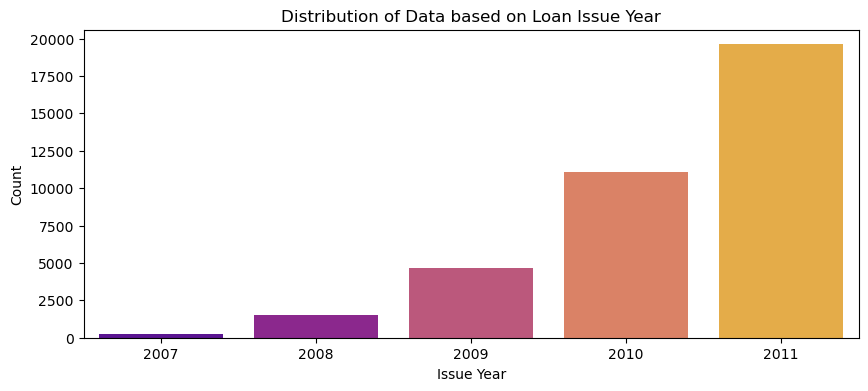

In [451]:
#Distribution of Loan Issue Year

plt.figure(figsize=(10,4))
ax = sns.countplot(x='issue_year', data=df, palette='plasma')
ax.set_title('Distribution of Data based on Loan Issue Year')
ax.set_xlabel('Issue Year')
ax.set_ylabel('Count')

plt.show()

Observation - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

## Segemented Univariate Analysis

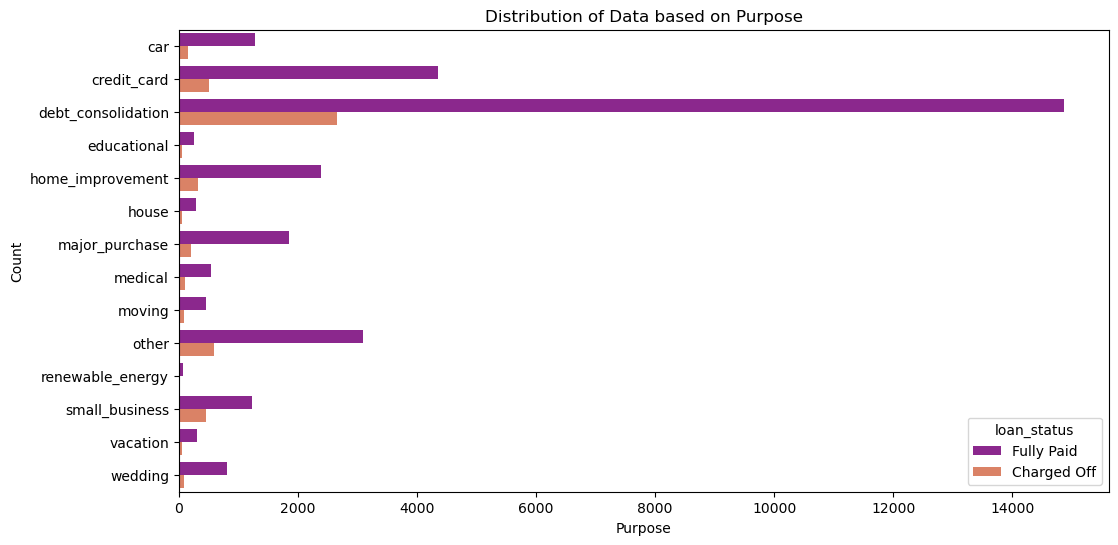

In [452]:
#Distribution of Purpose

plt.figure(figsize=(12,6))
ax = sns.countplot(y='purpose', data=df, palette='plasma', hue='loan_status')
ax.set_title('Distribution of Data based on Purpose')
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')

plt.show()

Observation - As we can see, most of the borrowers borrowed loan for Debt Consolidation purpose and are mostly fully paid or charged off as compared to other purposes

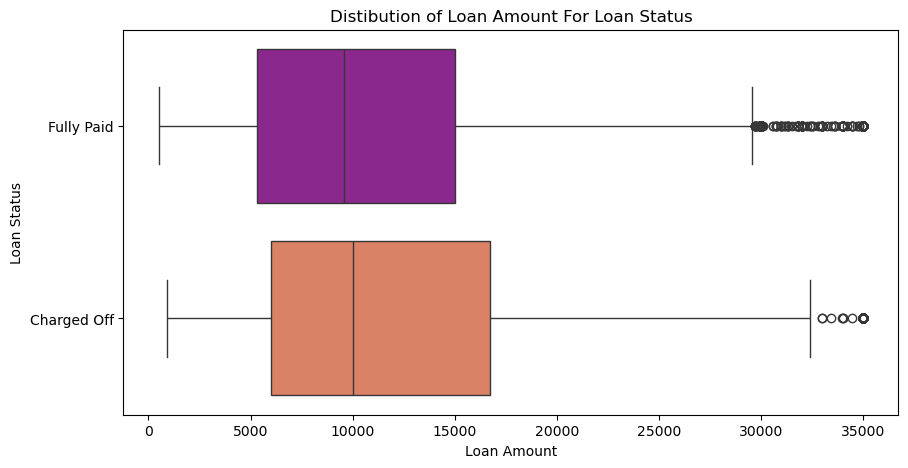

In [453]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='loan_amnt',y='loan_status', palette='plasma')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

Observation - The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

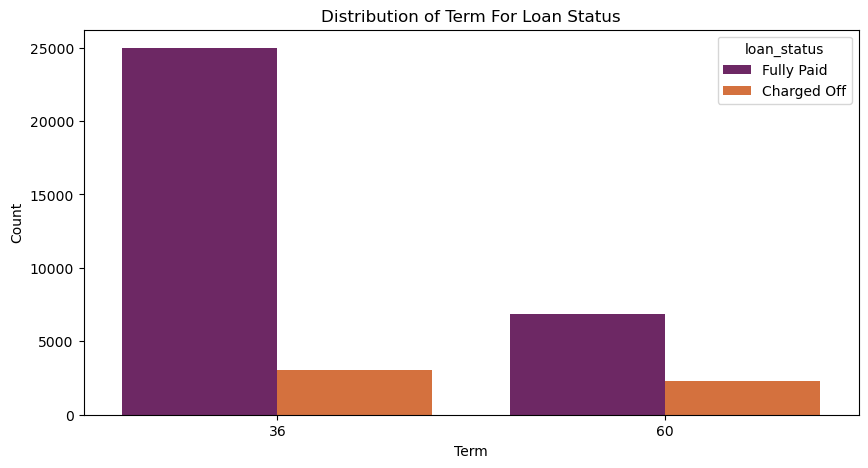

In [454]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='term',hue='loan_status', palette='inferno')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

Observation - As we can see, 60 months tenure loans are having higher chance to get defaulted while the 36 months tenure loans are having higher chance to get fully paid

Inference - Applicants applying for loan are more likely to repay the loan when applying for 36 months tenure than 60 months tenure

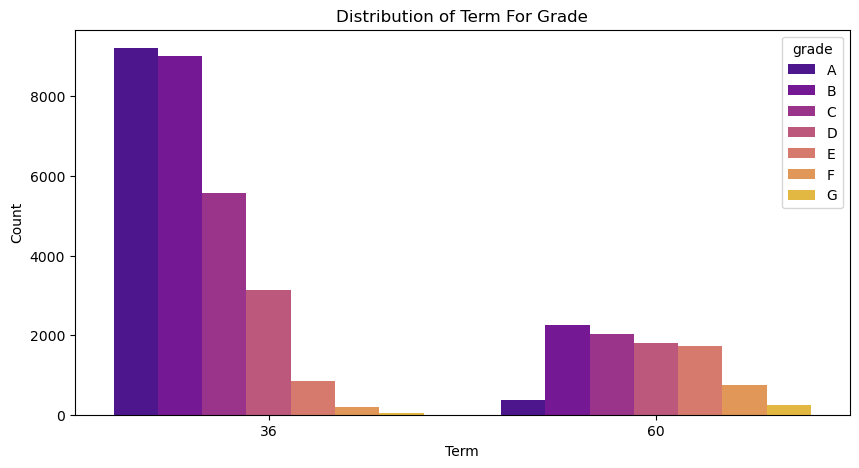

In [455]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='term',hue='grade',palette='plasma')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

Observation - Loans in 36 months tenure majorly consist of A and B grades while 60 months tenure majorly consist of B, C,D and E grade loans

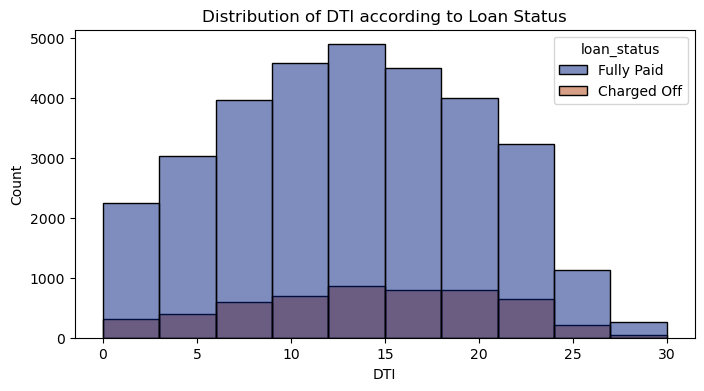

In [456]:
# Distribution of DTI based on Grade
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='dti',hue='loan_status',bins=10, palette='dark')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI according to Loan Status',fontsize=12)
plt.show()

Observation - As we can see most number of defaulted loan are between 10 to 15 debt to income ratio, hence we can infer that higher interest rates leads to higher defaulted loans and less fully paid loans

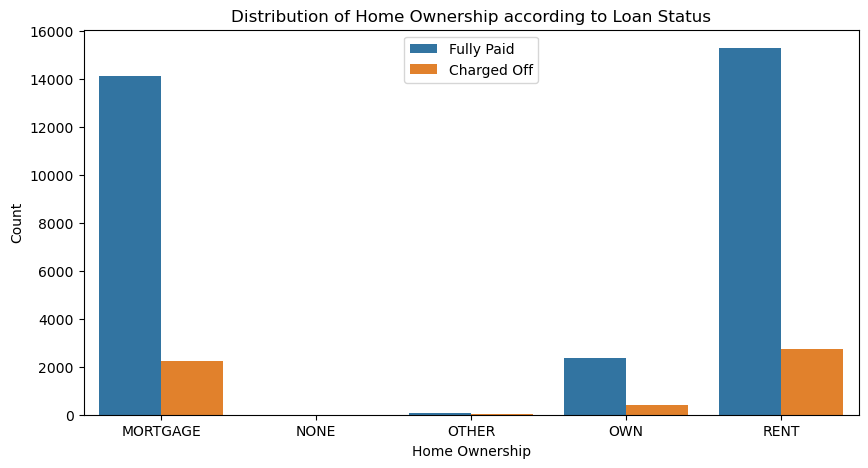

In [457]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership according to Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

Observation - Defaulted loans are less for those borrowers who own the property as compared to rent or mortgage

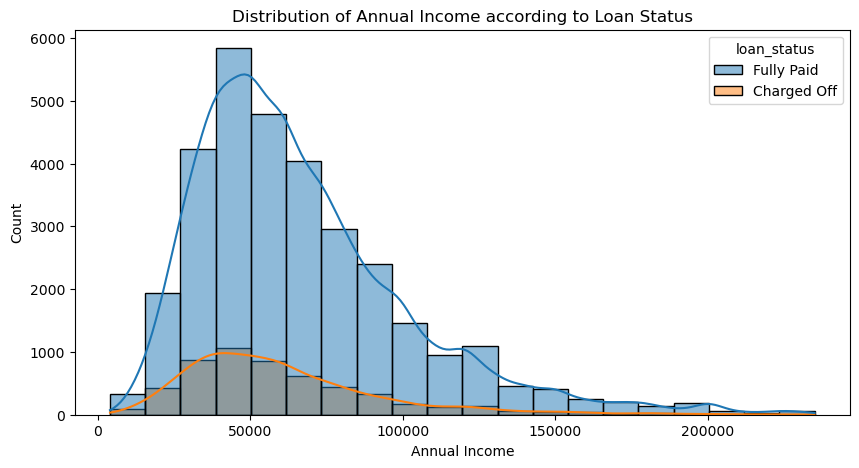

In [458]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income according to Loan Status',fontsize=12)
plt.show()

Observation - Borrowers with less than 50000 annual income are more likely to default and higher annual income are less likely to default as we can see in chart that the default loan count decreases as the income increases

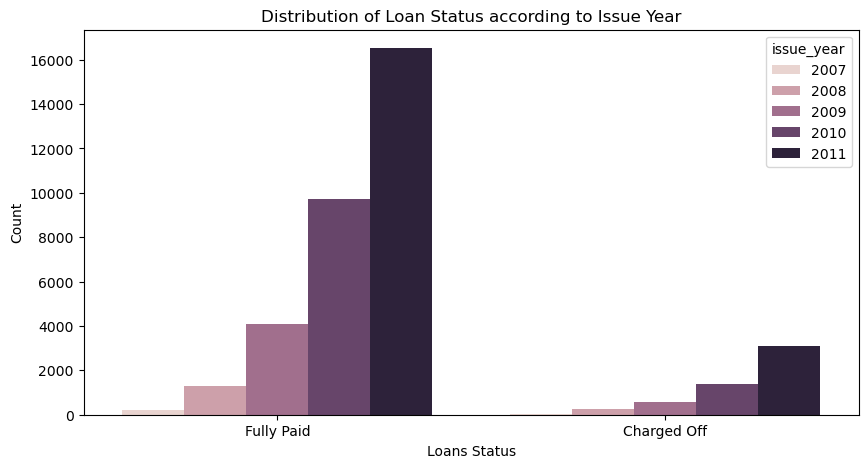

In [459]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status according to Issue Year',fontsize=12)
plt.show()

Observation - Fully Paid loans are increasing exponentially every year as compared to defaulted loans

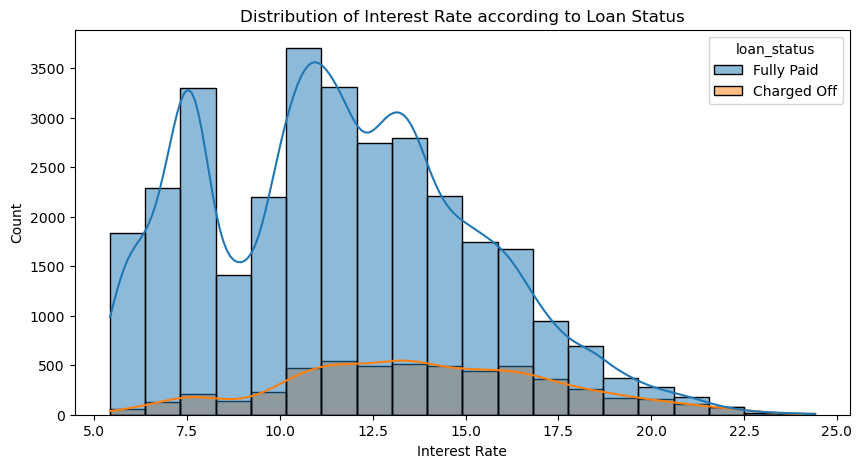

In [460]:
# Distribution of int_rate based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate according to Loan Status',fontsize=12)
plt.show()

Observation - The default loan amount increases with interest rate at 10 % and shows a decline after 17.5 % interest rate.

Inference - Lending club should focus on interest rate less than 10% as there applicants are more likely to repay the loan

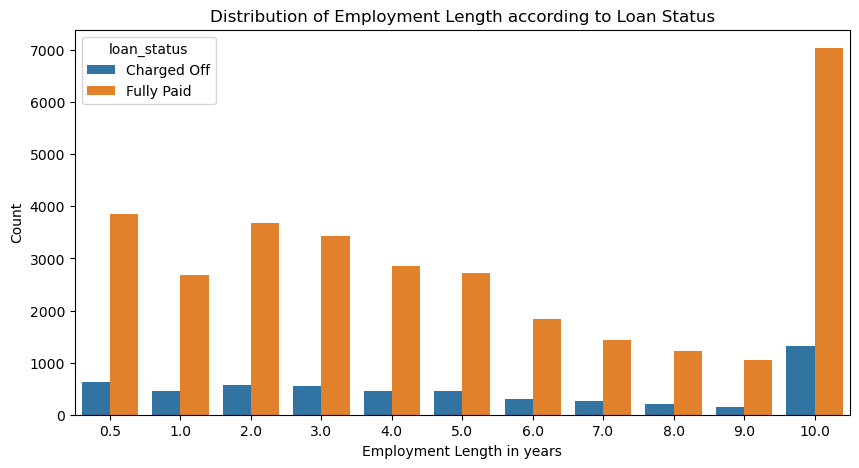

In [461]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length according to Loan Status',fontsize=12)
plt.show()

Observation - The Employees with 10+ years of experience are likely to default more but they have a far higher chance of fully paying the loan.

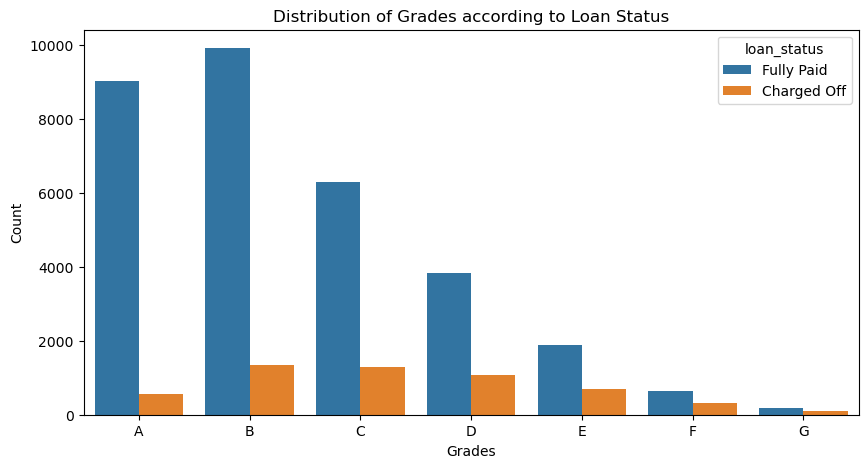

In [462]:
# Distribution of grades based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='grade',hue='loan_status')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.title('Distribution of Grades according to Loan Status',fontsize=12)
plt.show()

Observation - Most number of fully paid loans are of Grade A and B while the grades D,E,F,G are having most number of defaulted loans

## Bivariate Analysis

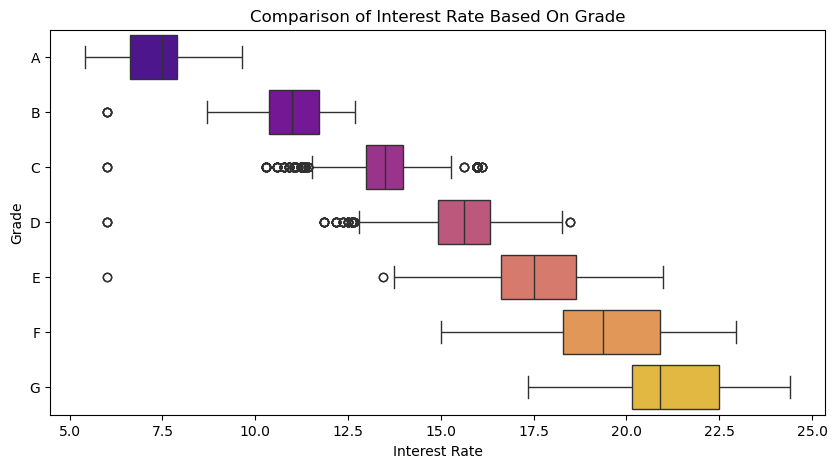

In [463]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='int_rate', y='grade', palette='plasma')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

Observation

- Borrowers in Grade A receive the lowest and most consistent interest rates, indicating they are likely the most creditworthy.
- Borrowers in Grades F and G receive significantly higher and more varied interest rates, likely due to higher credit risk.
- The trend aligns with the assumption that higher grades are associated with better credit profiles and lower loan risks.


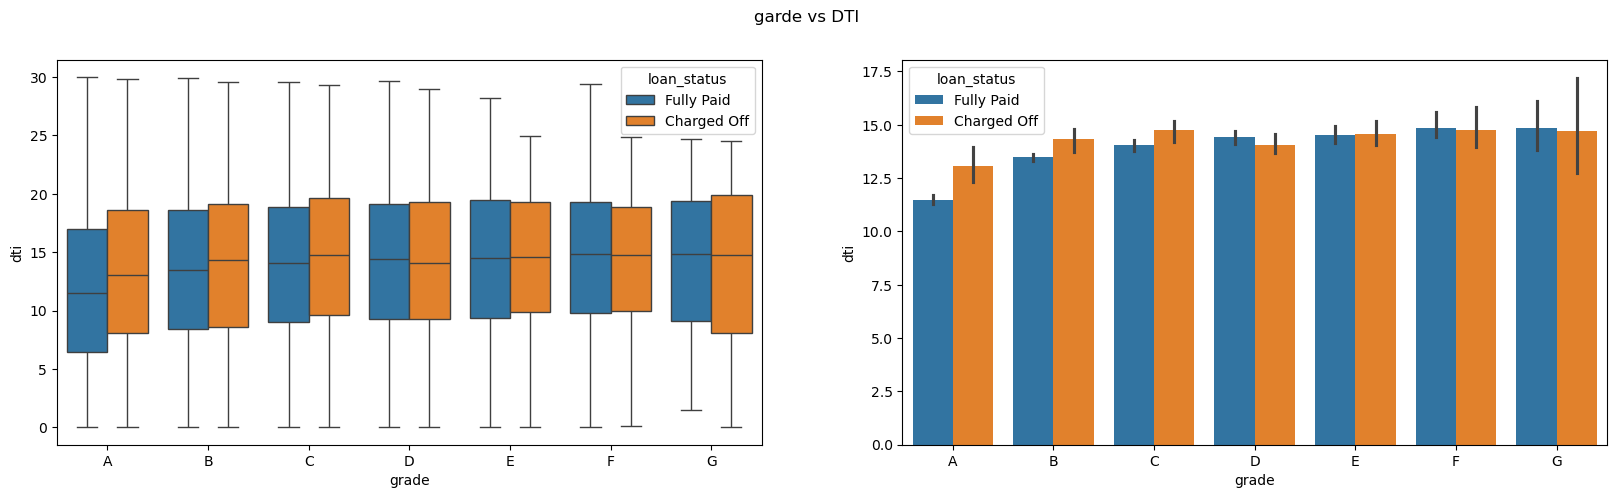

In [464]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=df, order=df.grade.unique().sort_values())
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=df, estimator=np.median, order = df.grade.unique().sort_values())
plt.suptitle('garde vs DTI')
plt.show()

Observation - Higher Grade A has lowest debt to income ratio and are less likely to default, apart from that there is not much correlation  

Inference - People with less debt to income ratio are likely to repay the loan

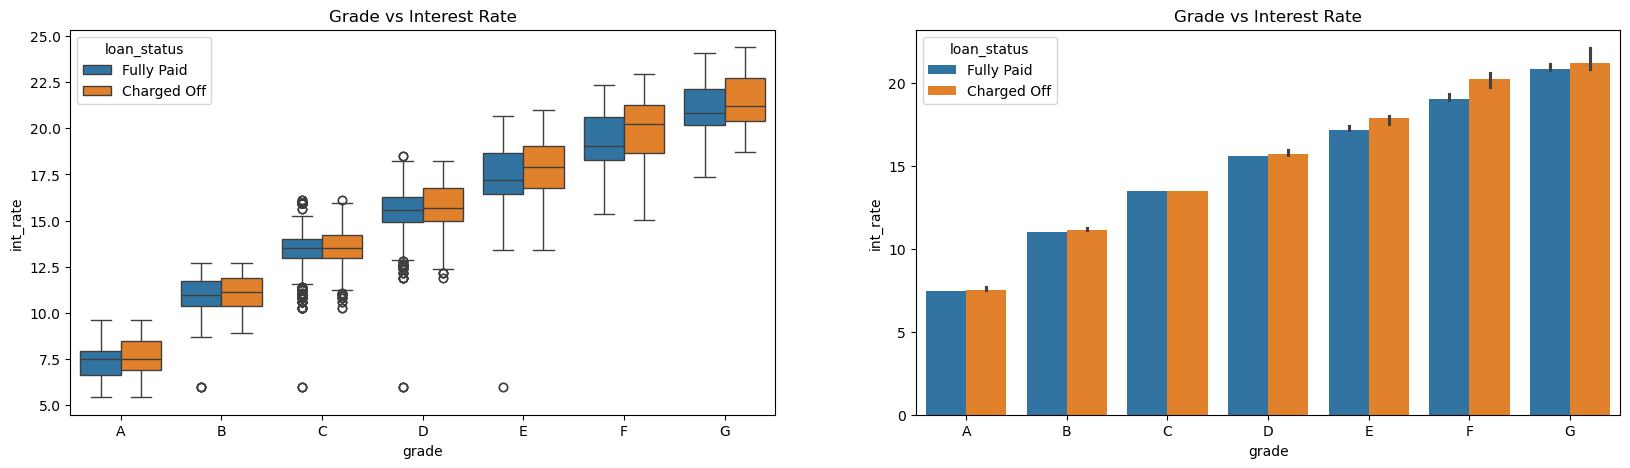

In [465]:
#Comparison of interest rates with grades over loan status
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=df, order = df.grade.unique().sort_values())
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=df, order = df.grade.unique().sort_values(), estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

Observation - As we can see, interest rates are increasing as grades are, hence more likely to default on loan


Text(0.5, 1.0, 'Grade vs Loan status')

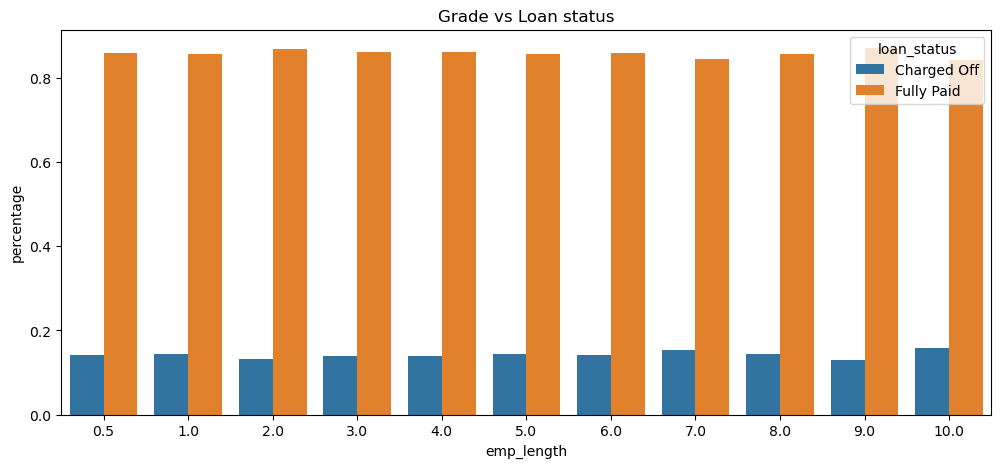

In [466]:
#Comparison of Employment length with grades over loan status

df1 = df.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df1['percentage'] = df1.groupby('emp_length')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df1)
plt.title('Grade vs Loan status')

Observation - There is no big change or pattern observed across defaulters and working experience.

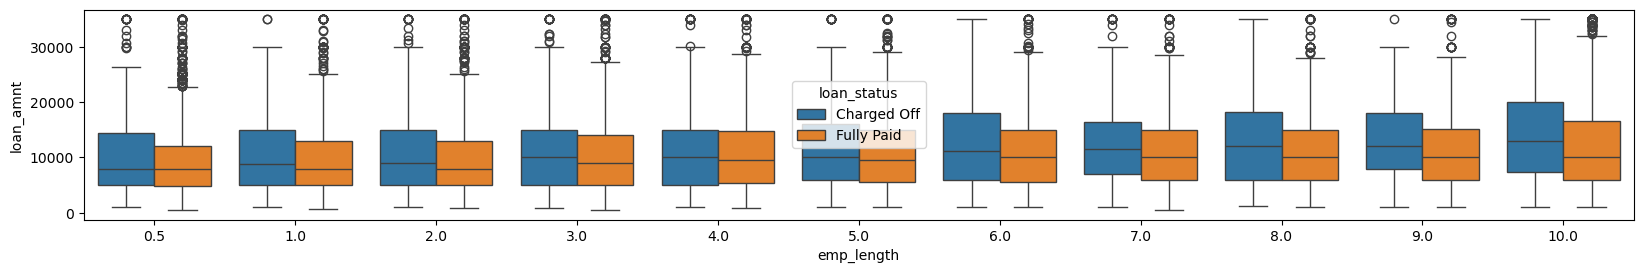

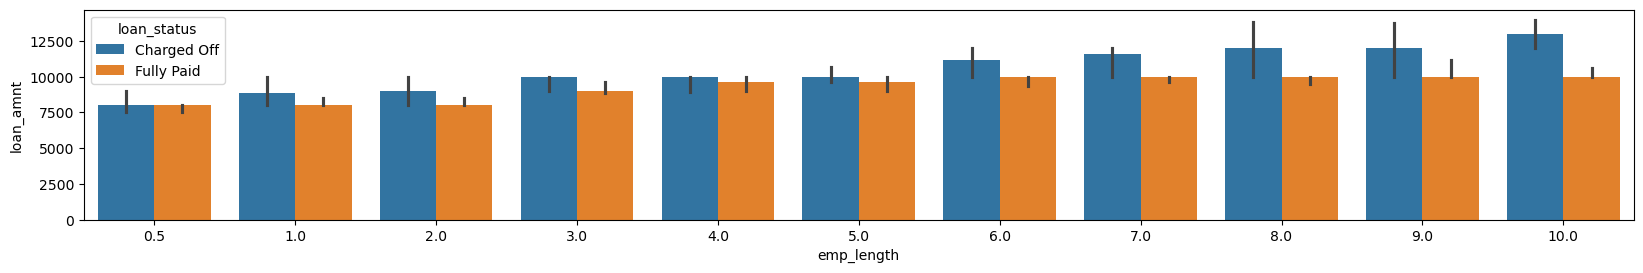

In [472]:

#Comparison of employment length with loan amount over loan status

plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df, estimator=np.median)
plt.show()

Observation - Borrowers with higher working experience took loans of higher amounts got more default rate.

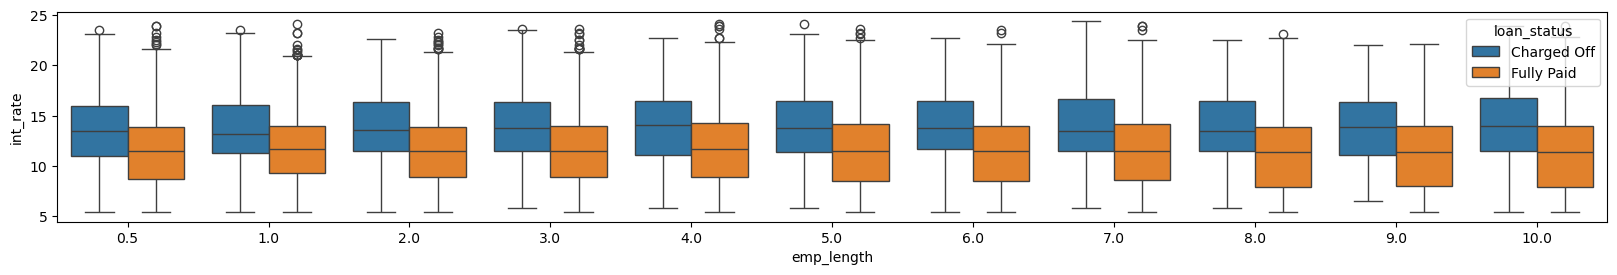

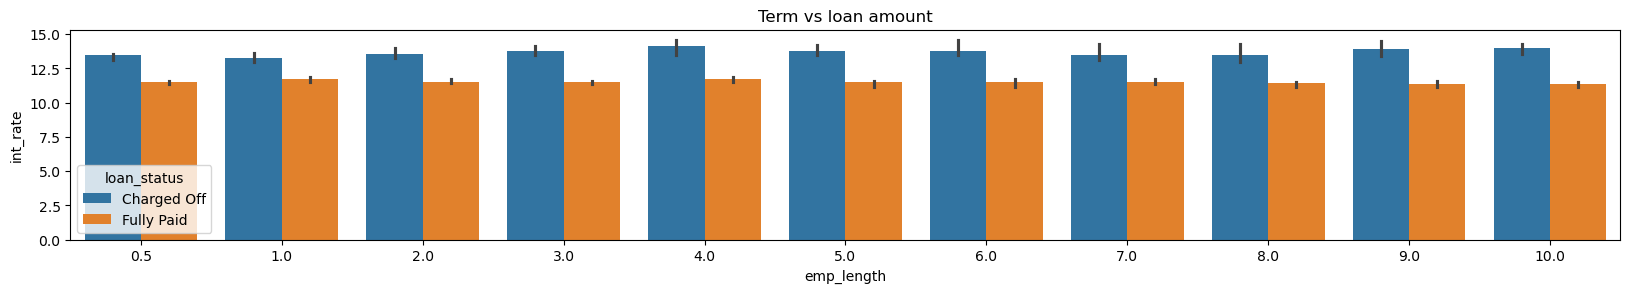

In [468]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=df)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=df, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

Observation - Irrespective of employment length, loans with more interest rates got defaulted more.

Inference - Applicants are less likely to repay the loan if interest rate is greater


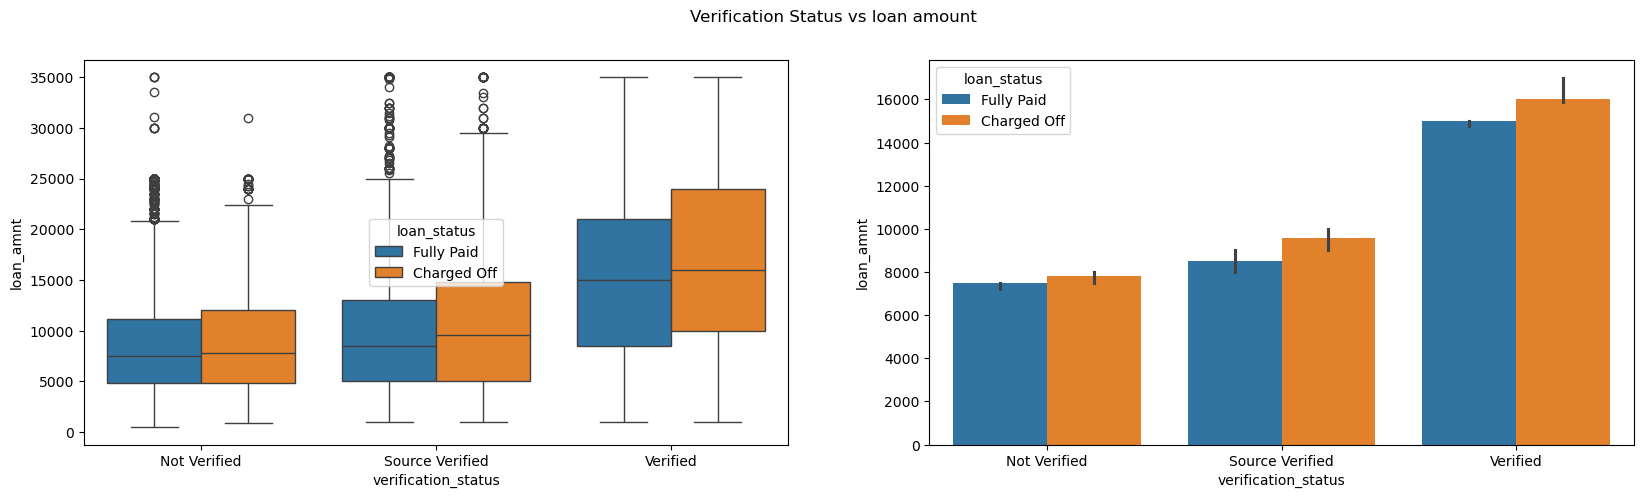

In [469]:
# Verification status vs loan amount
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=df)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=df, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

Observation 
- Verified loans are given more loan amounts as compared to others.
- There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

<Figure size 640x480 with 0 Axes>

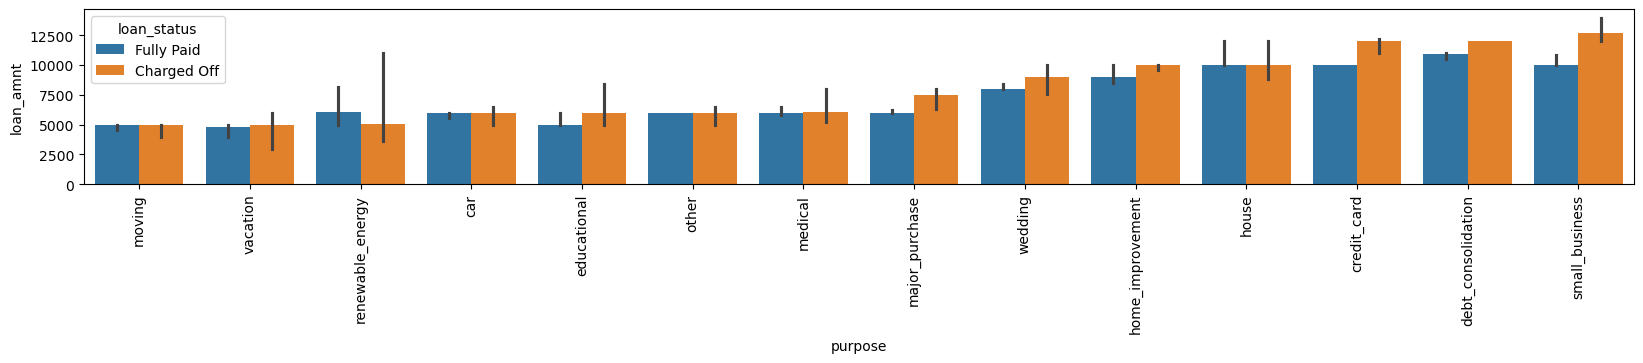

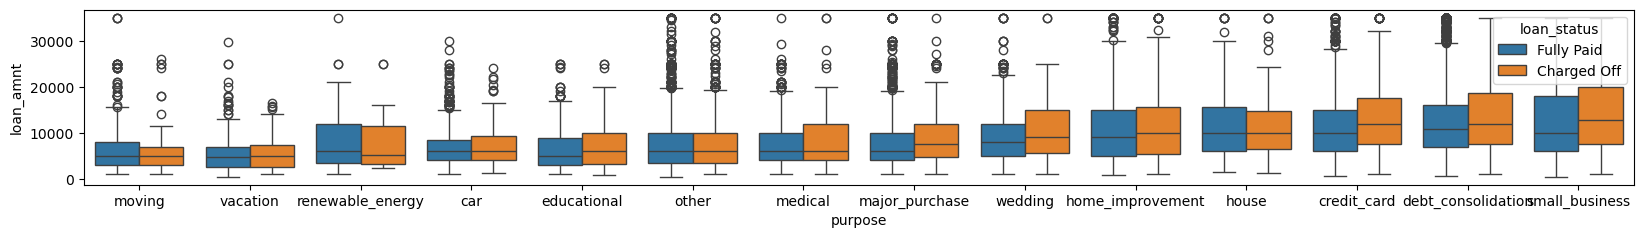

In [470]:
df3 = df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= df, order=df3[df3.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= df, order=df3[df3.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

Observation - Smaller Businesses have more default loans and also higher loan amounts.

Inference - Smaller business loans are less likely to be repaid

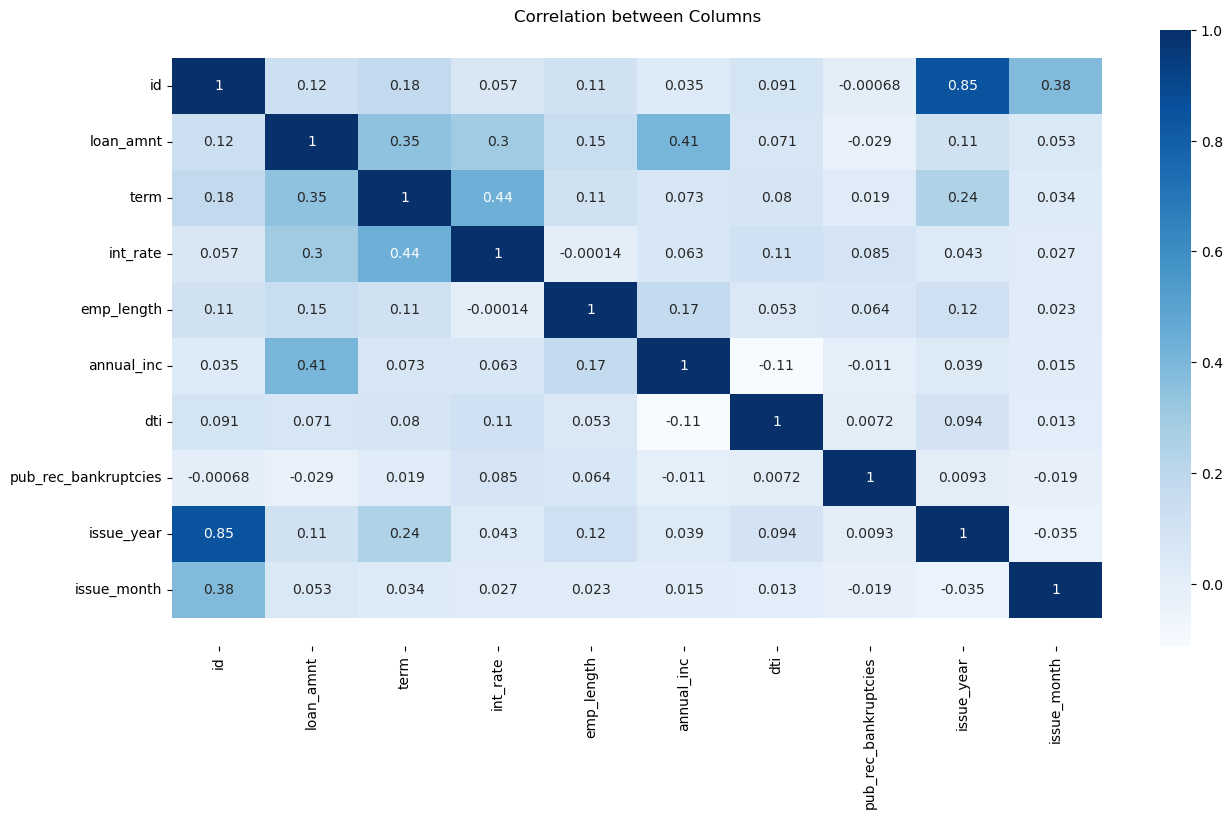

In [471]:
#Finding correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(15,8))
#plotting correlation matrix on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

Observation

- Loan amount is positively correlated with annual income, interest rate and term
- Term is positively correlated with interest rate and loan amount

### Conclusion

#### Univariate Analysis


- The majority of loan has a term of 36 months compared to 60 months.
- The interest rate is more crowded around 5-10 and 10-15 with a drop near 10
- A large amount of loans are with grade 'A' and 'B' compared to rest showing most loans are high grade loans.
- Majority of borrowers have working experience greater than 10 years.
- Majority of borrowers don't own property and are on mortage or rent.
- About 50% of the borrowers are verified by the company or have source verified.
- Annual Income shows left skewed normal distribution thus we can say that the majority of borrowers have very low annual income compared to rest.
- A large percentage of loans are taken for debt consolidation followed by credit card.
- Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
- Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
- Majority of the borrowers have no record of Public Recorded Bankruptcy.
- Majority of the loans are given in last quarter of the year.
- The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

#### Segmented Univariate Analysis

- Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
- The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
- The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of repayment
- The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
- The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
- The Defaulted loan are lower for the borrowers who own their property compared to on mortgage or rent.
- Burrowers with less than 50000 annual income are more likely to default and higher annual income are less likely to default.
- The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
- The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
- The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

#### Bivariate Analysis

- The trend aligns with the assumption that higher grades are associated with better credit profiles and lower loan risks.
- People with less debt to income ratio are likely to repay the loan
- Applicants are less likely to repay the loan if interest rate is greater
- Loan Amount for Verified loans were more as compared to non verified ones
- The borrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.
- Smaller businesses are most likely to default on the loan

## Recommendations

Major Driving Factors which can be used to predict the chance of defaulting and avoiding Credit Loss

- DTI (Debt to Income Ratio)
- Interest rate
- Grades
- Verification Status
- Annual Income
- Public record bankruptcies

Less Likely to repay the loan or default

- Borrowers not from large urban cities like california, new york, texas, florida etc.
- Borrowers having annual income in the range 50000-100000.
- Borrowers having Public Recorded Bankruptcy.
- Borrowers with least grades like E,F,G which indicates high risk.
- Borrowers with very high Debt to Income value.
- Borrowers with working experience 10+ years.
